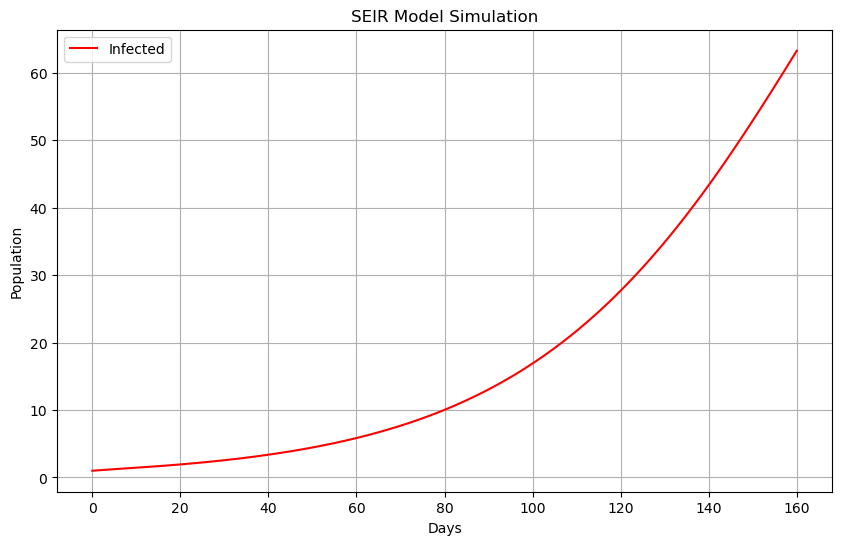

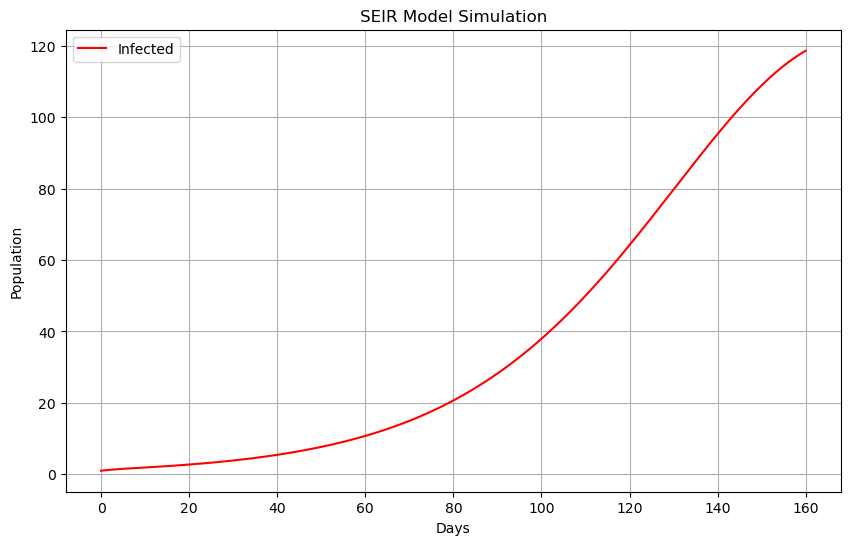

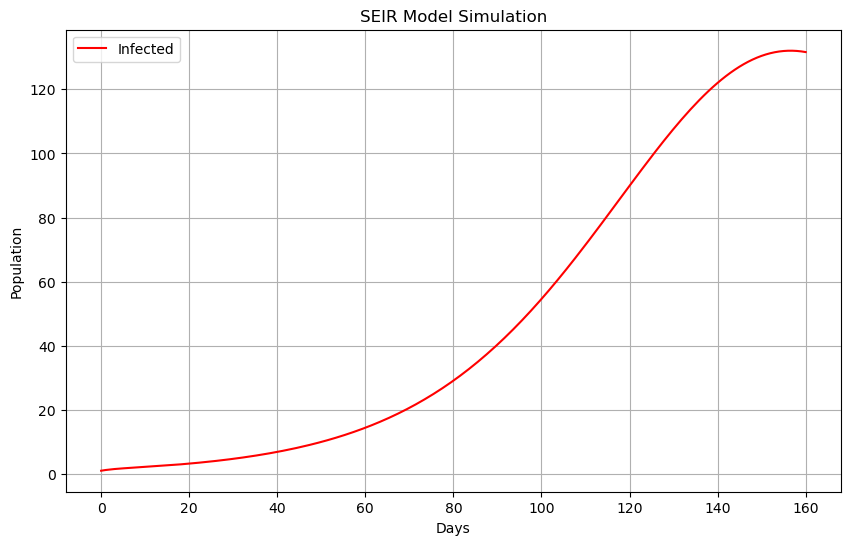

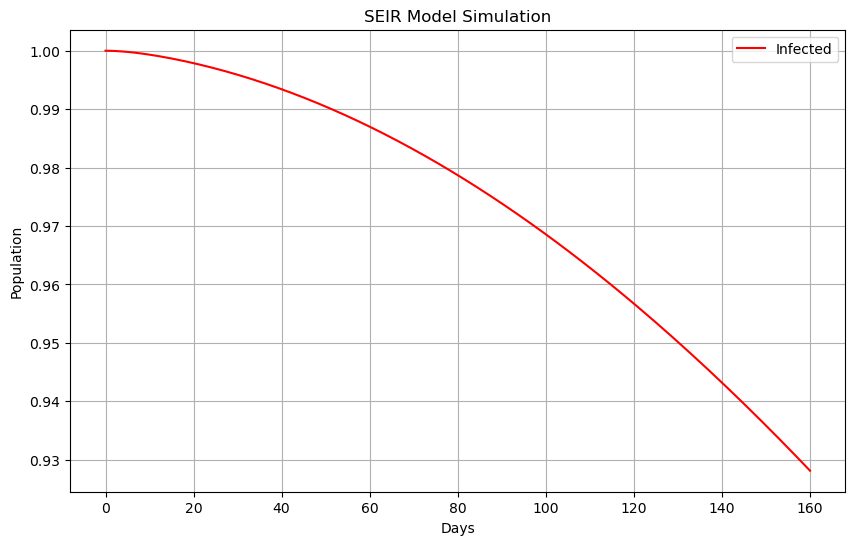

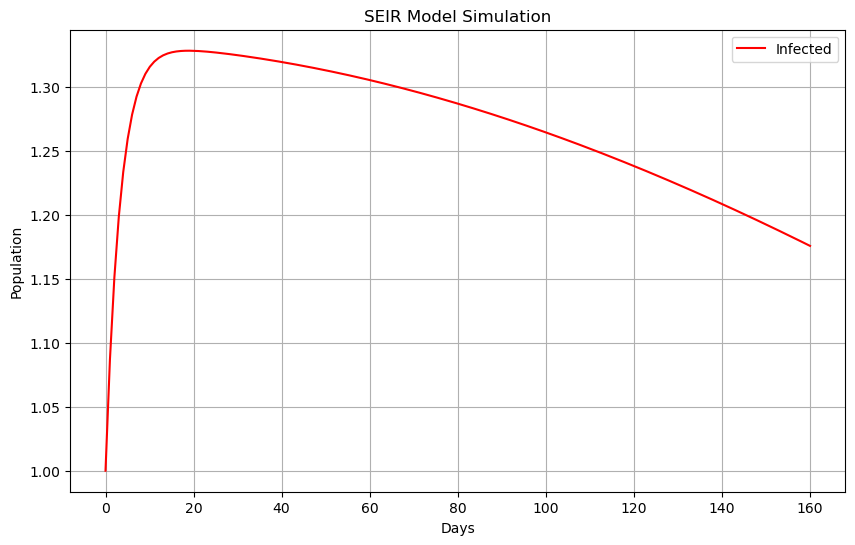

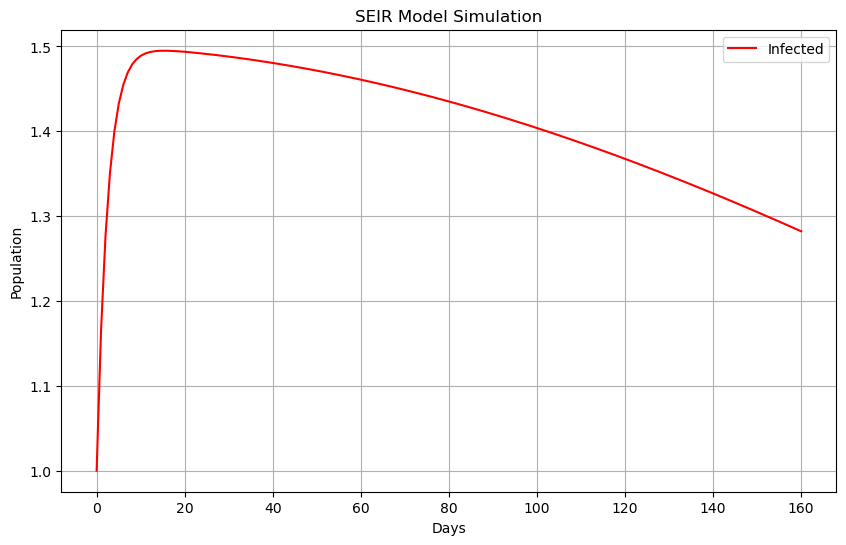

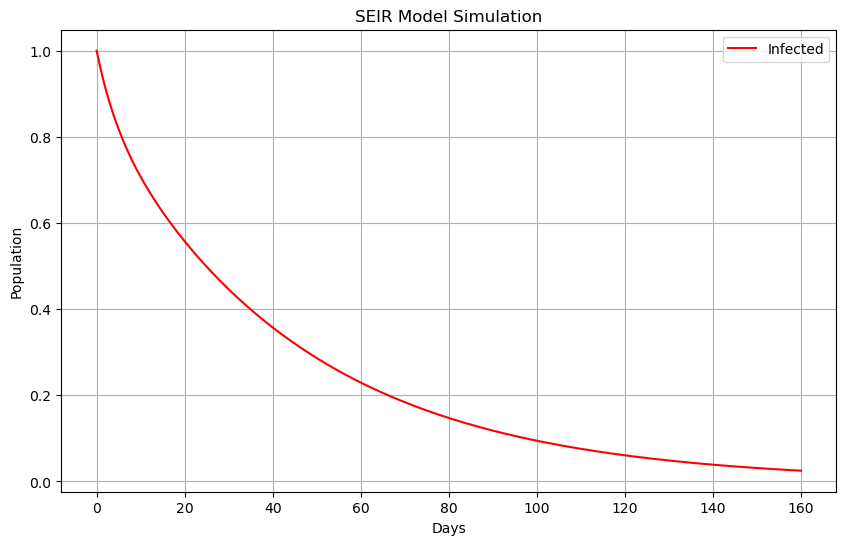

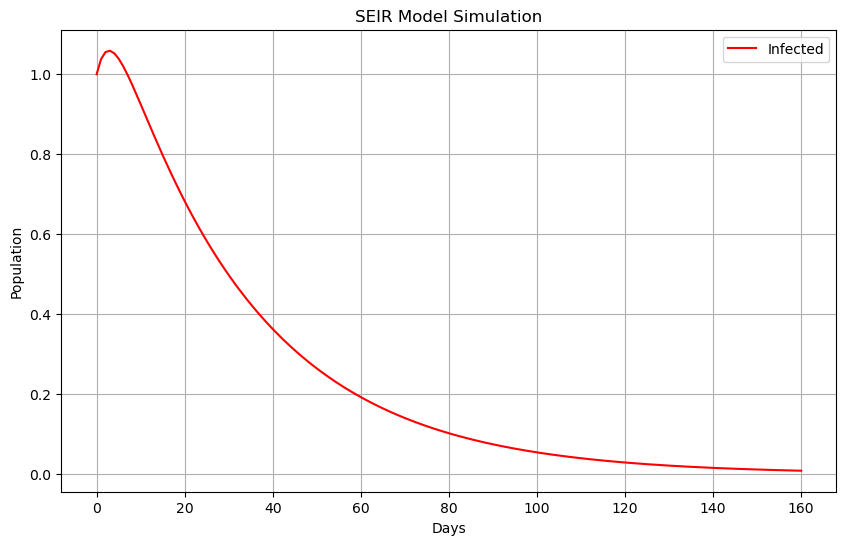

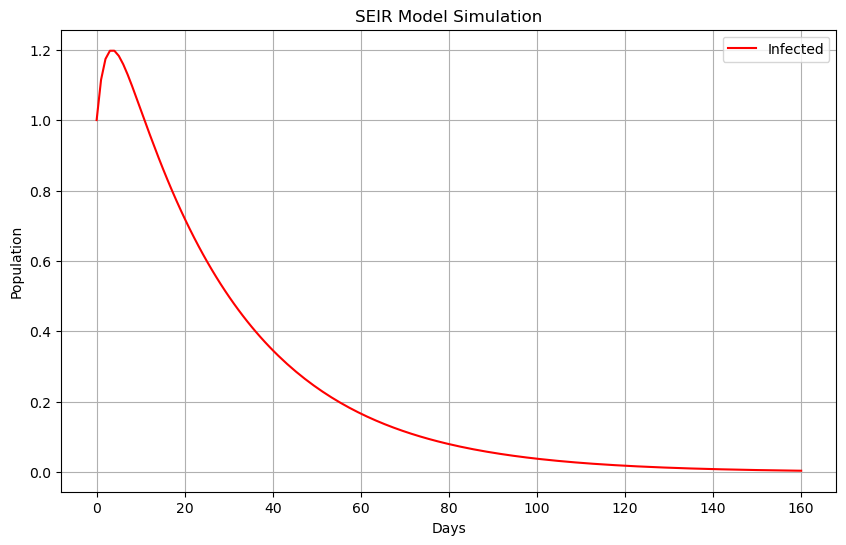

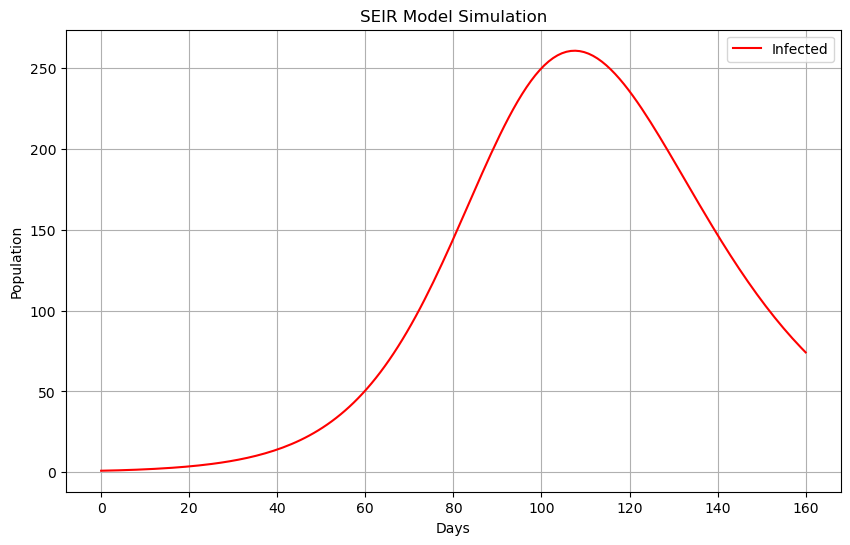

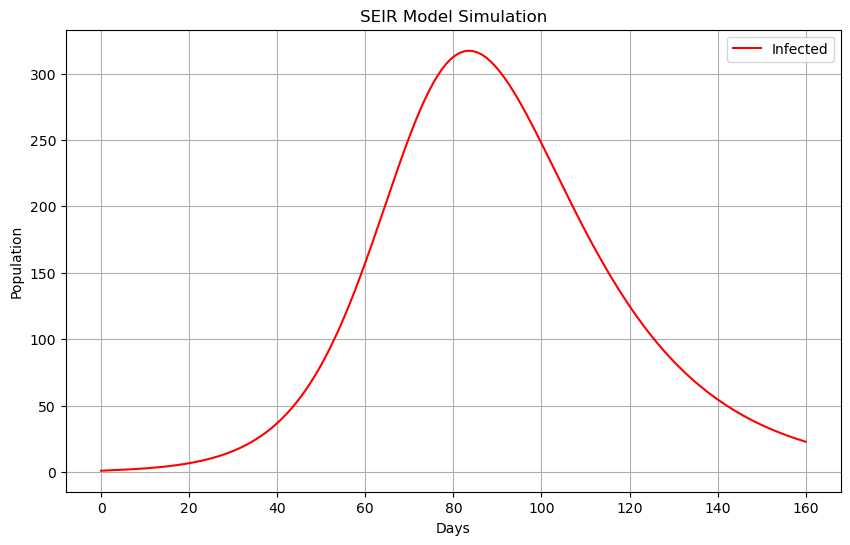

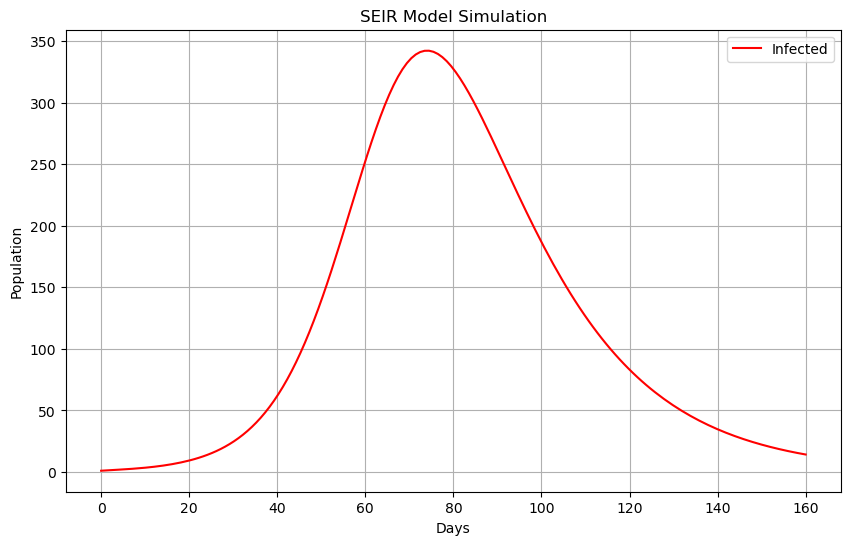

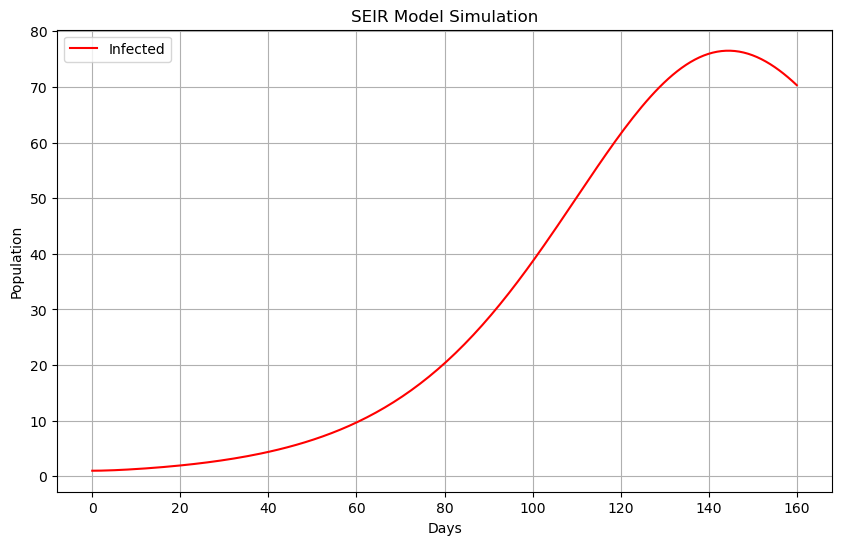

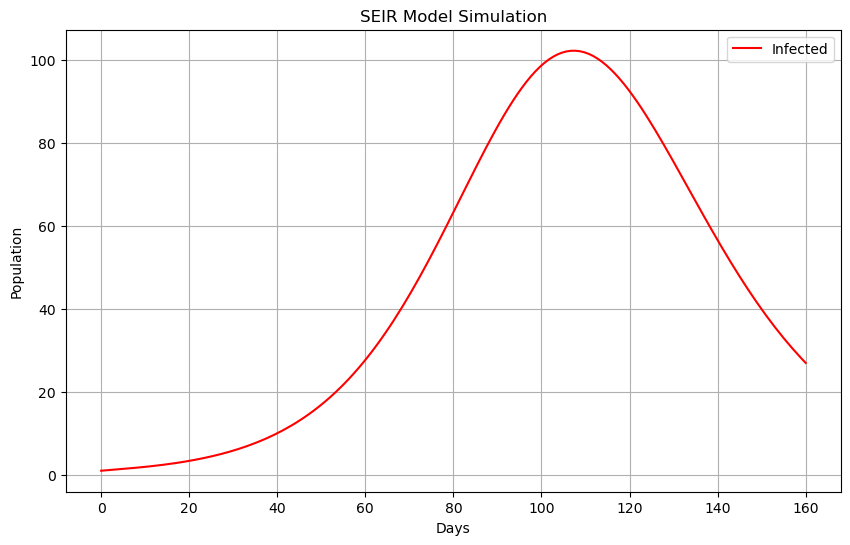

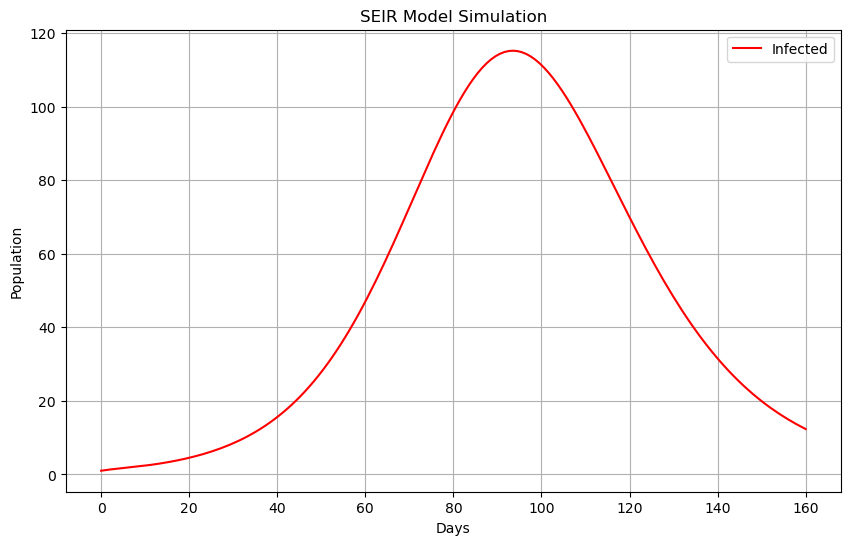

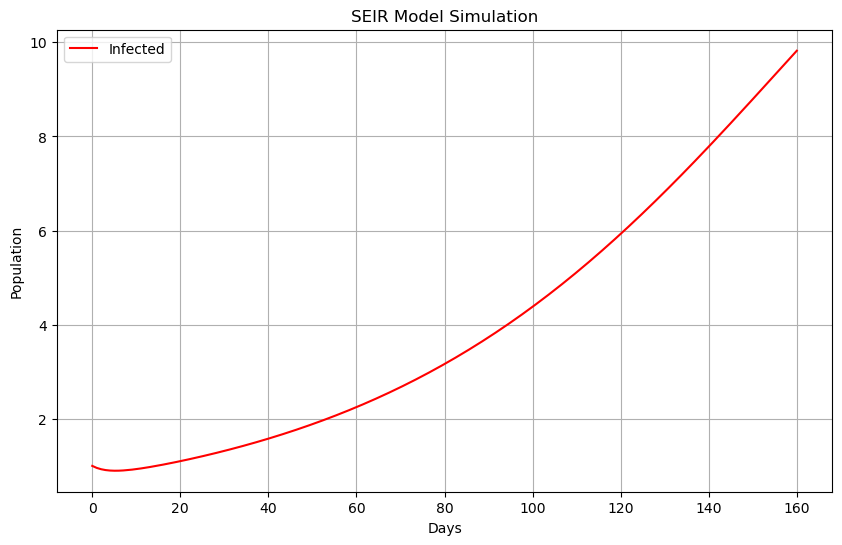

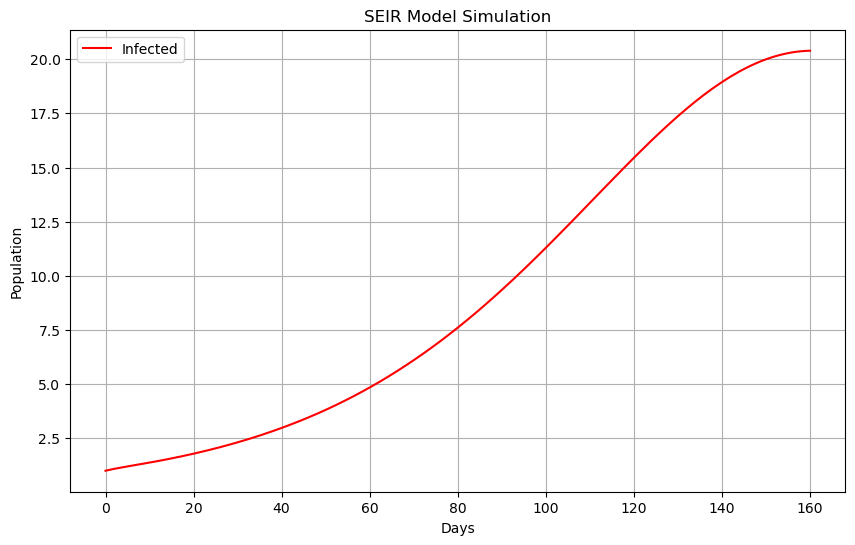

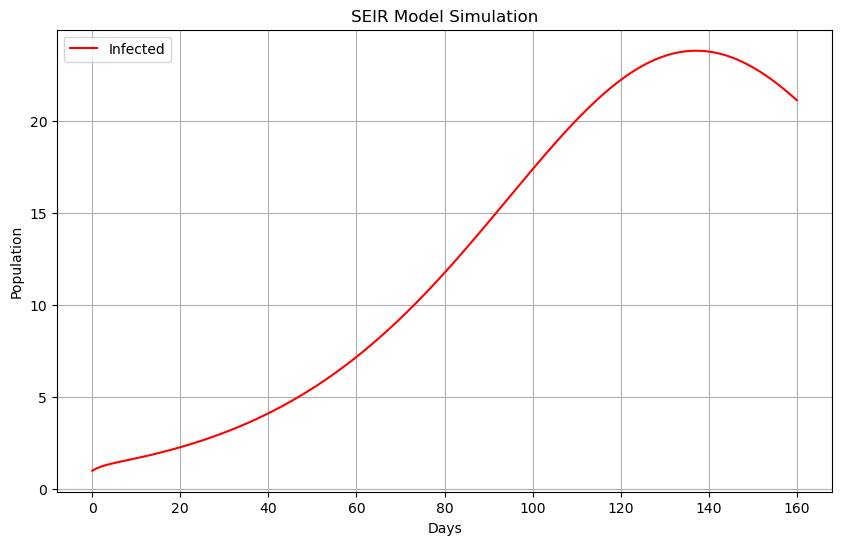

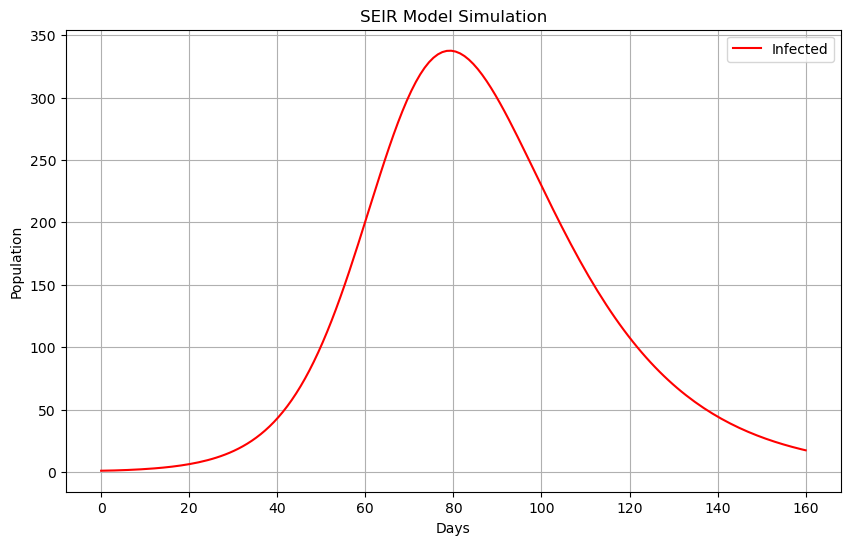

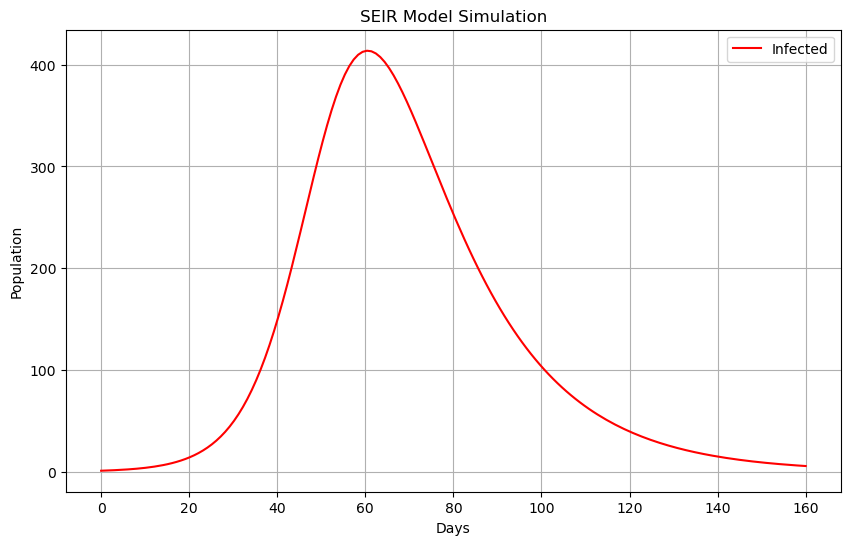

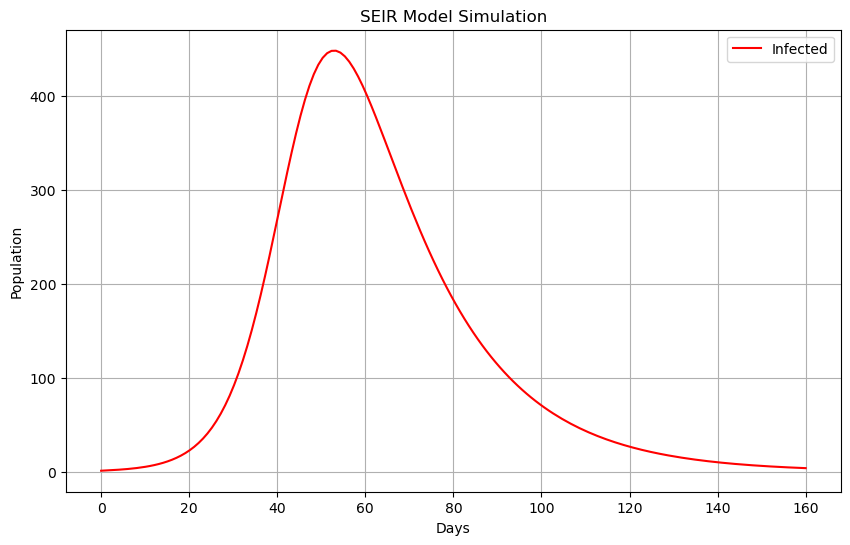

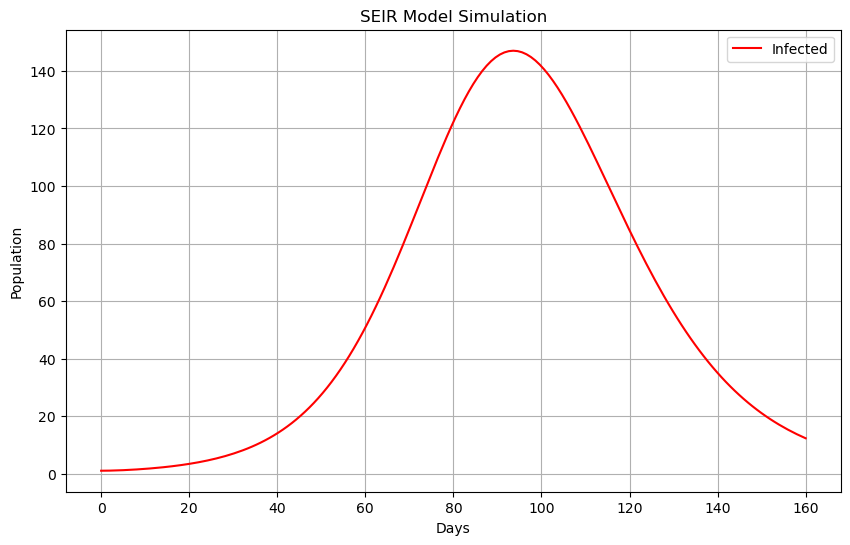

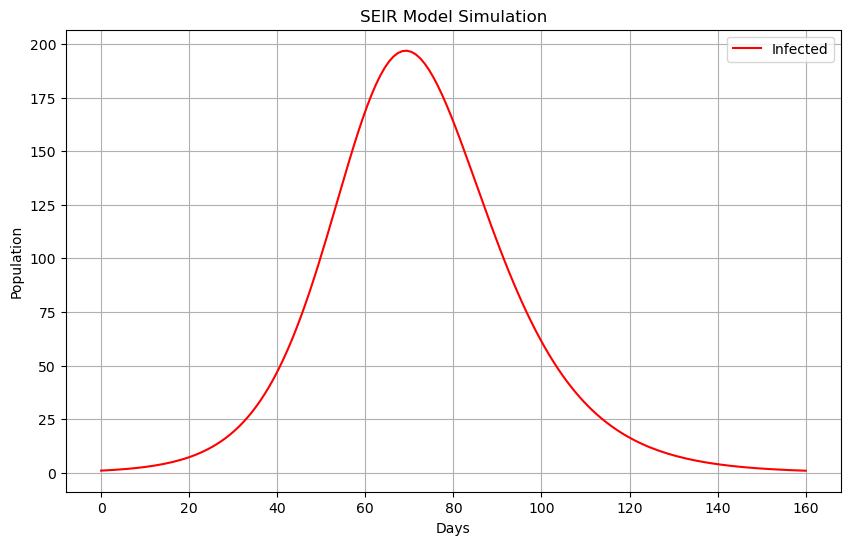

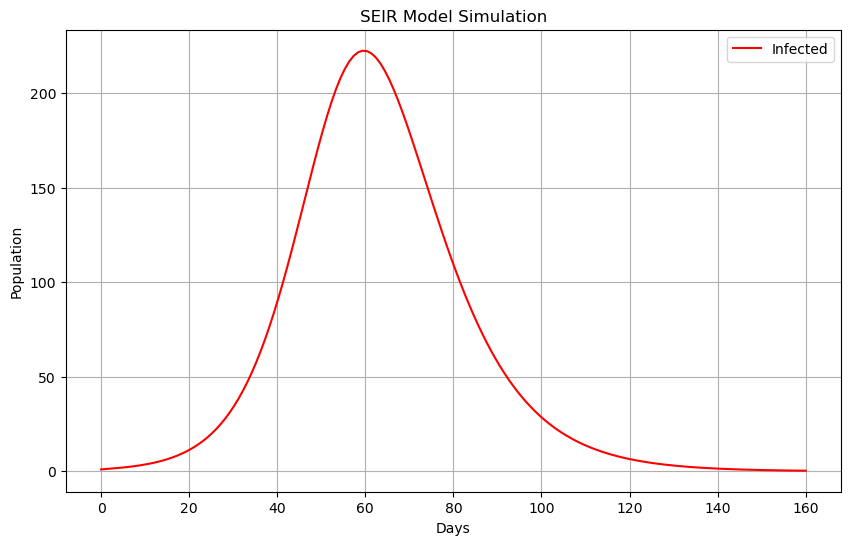

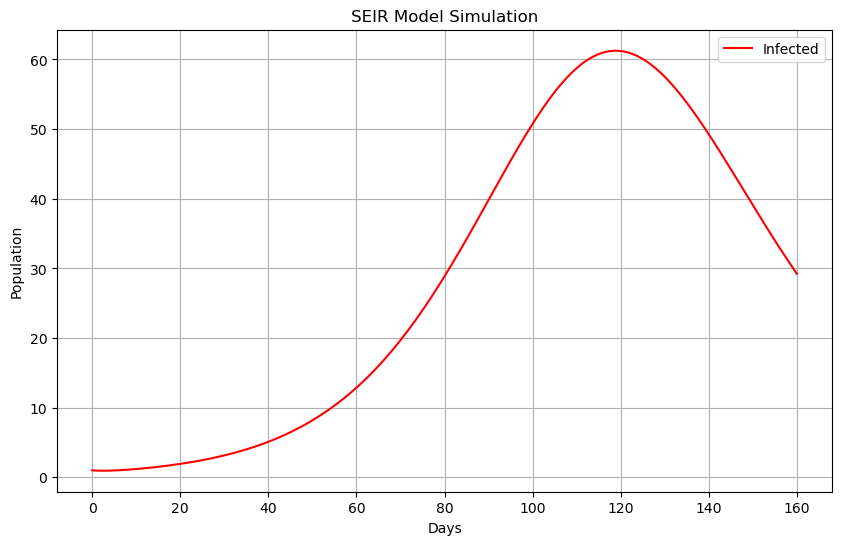

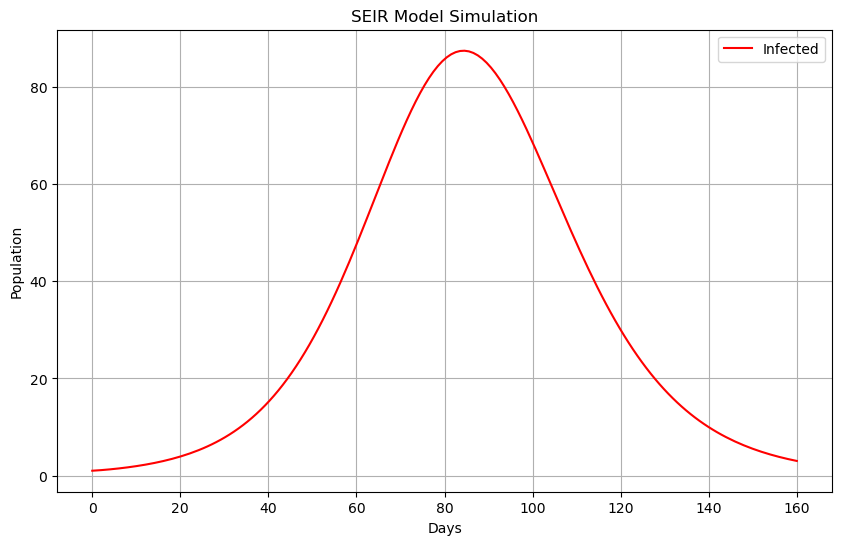

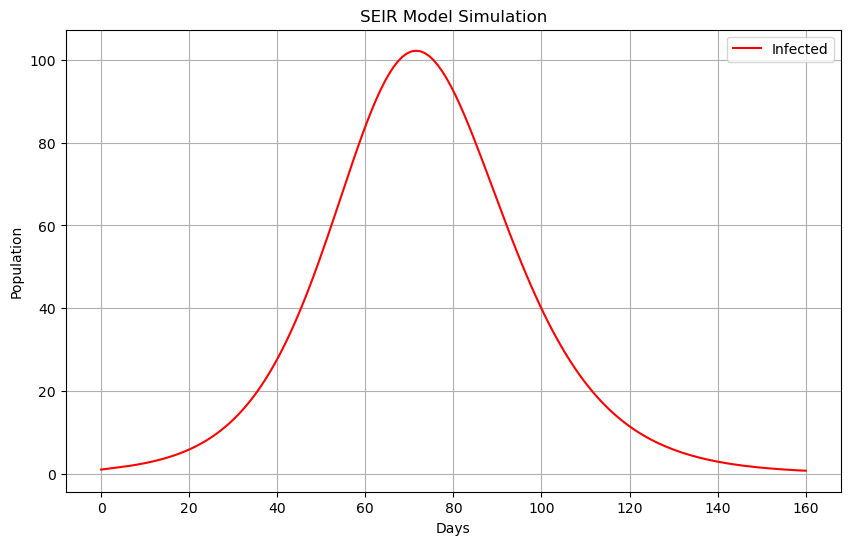

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function to run SEIR model simulation and plot the results.
def run_seir_model(N, beta, gamma, delta, E0, I0, days):
    # Initial number of infected and recovered individuals, everyone else is susceptible to infection initially.
    R0 = 0
    S0 = N - E0 - I0 - R0

    # Initial conditions vector
    y0 = S0, E0, I0, R0

    # A grid of time points (in days)
    t = np.linspace(0, days, days)

    # SEIR model differential equations.
    def deriv(y, t, N, beta, gamma, delta):
        S, E, I, R = y
        dSdt = -beta * S * I / N
        dEdt = beta * S * I / N - delta * E
        dIdt = delta * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt

    # Integrate the SEIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
    S, E, I, R = ret.T

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(t, I, 'r', label='Infected')
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.title('SEIR Model Simulation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set the parameters for the SEIR model
N = 1000  # total population
E0 = 1  # initial number of exposed individuals
I0 = 1  # initial number of infected individuals
days = 160

# Varying parameters for exploration
beta_values = [0.1, 0.2, 0.3]
gamma_values = [0.05, 0.1, 0.15]
delta_values = [0.1, 0.2, 0.3]

# Run SEIR model simulations with varying parameters
for beta in beta_values:
    for gamma in gamma_values:
        for delta in delta_values:
            run_seir_model(N, beta, gamma, delta, E0, I0, days)


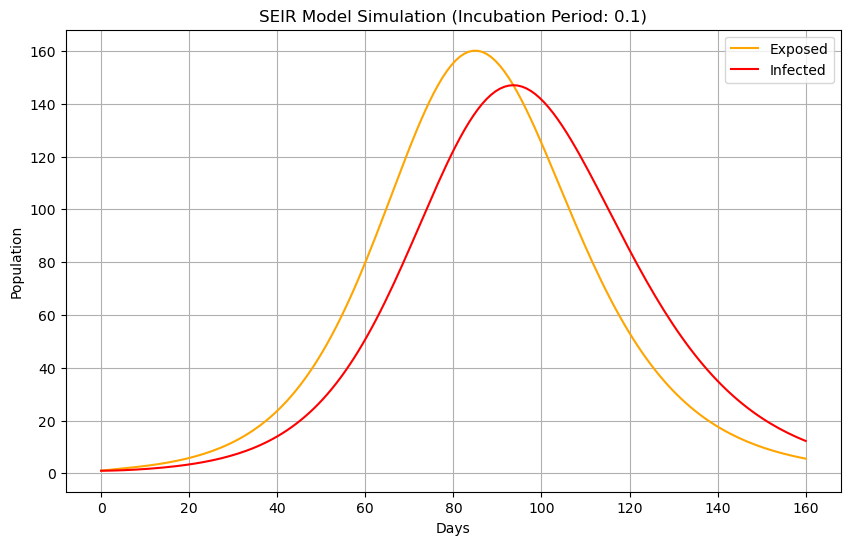

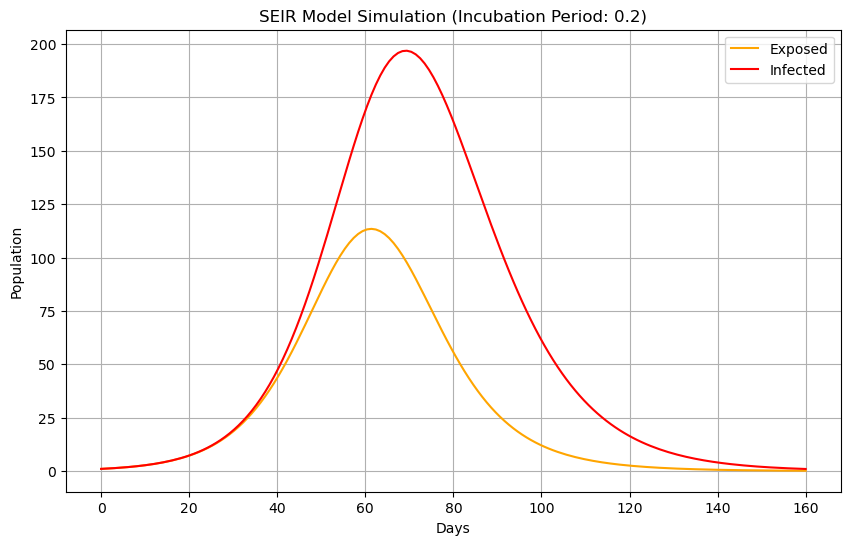

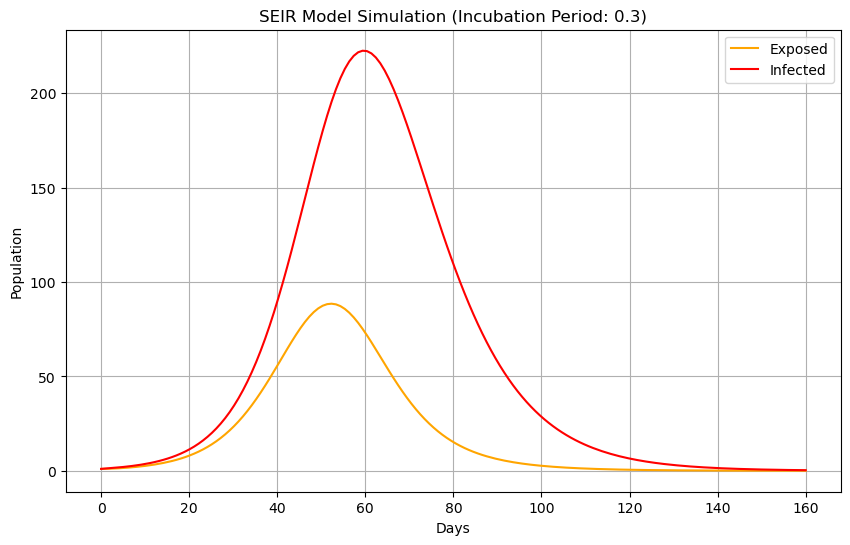

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def run_seir_model(N, beta, gamma, delta, E0, I0, days):
    # Initial number of infected and recovered individuals, everyone else is susceptible to infection initially.
    R0 = 0
    S0 = N - E0 - I0 - R0

    # Initial conditions vector
    y0 = S0, E0, I0, R0

    # A grid of time points (in days)
    t = np.linspace(0, days, days)

    # SEIR model differential equations.
    def deriv(y, t, N, beta, gamma, delta):
        S, E, I, R = y
        dSdt = -beta * S * I / N
        dEdt = beta * S * I / N - delta * E
        dIdt = delta * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt

    # Integrate the SEIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
    S, E, I, R = ret.T

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(t, E, 'orange', label='Exposed')
    plt.plot(t, I, 'r', label='Infected')
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.title(f'SEIR Model Simulation (Incubation Period: {delta})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set the parameters for the SEIR model
N = 1000  # total population
beta = 0.3  # contact rate
gamma = 0.1  # recovery rate
E0 = 1  # initial number of exposed individuals
I0 = 1  # initial number of infected individuals
days = 160

# Varying incubation periods 
delta_values = [0.1, 0.2, 0.3]

# Run SEIR model simulations with varying incubation periods
for delta in delta_values:
    run_seir_model(N, beta, gamma, delta, E0, I0, days)


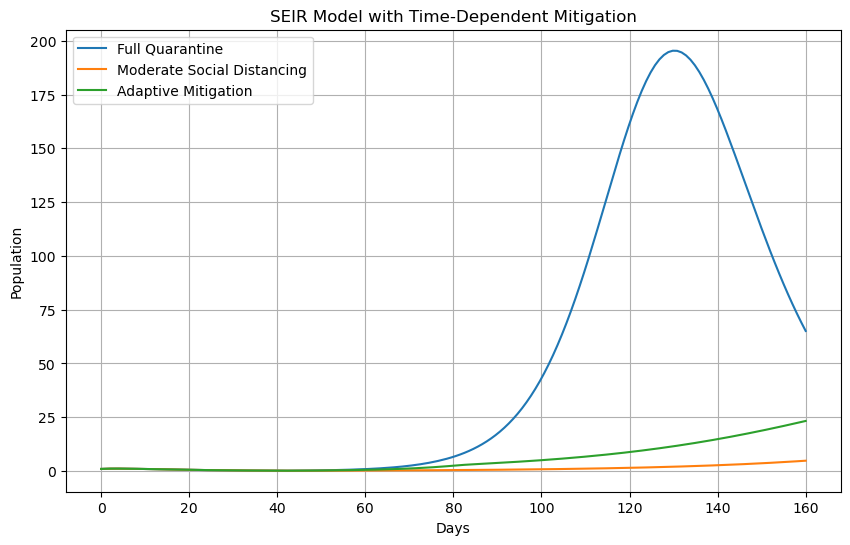

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function to run SEIR model simulation with time-dependent mitigation and plot the results.
def run_time_dependent_mitigation_model(N, beta, gamma, delta, E0, I0, days, mitigation_function, label):
    # Initial number of infected and recovered individuals, everyone else is susceptible to infection initially.
    R0 = 0
    S0 = N - E0 - I0 - R0

    # Initial conditions vector
    y0 = S0, E0, I0, R0

    # A grid of time points (in days)
    t = np.linspace(0, days, days)

    # SEIR model differential equations with time-dependent mitigation
    def deriv(y, t, N, beta, gamma, delta, mitigation_function):
        S, E, I, R = y
        mitigation_factor = mitigation_function(t)
        dSdt = -mitigation_factor * beta * S * I / N
        dEdt = mitigation_factor * beta * S * I / N - delta * E
        dIdt = delta * E - gamma * I
        dRdt = gamma * I
        return dSdt, dEdt, dIdt, dRdt

    # Integrate the SEIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, mitigation_function))
    S, E, I, R = ret.T

    # Plot the data
    plt.plot(t, I, label=label)
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.title('SEIR Model with Time-Dependent Mitigation')
    plt.legend()

# Set the parameters for the SEIR model
N = 1000  # total population
E0 = 1    # initial number of exposed individuals
I0 = 1    # initial number of infected individuals
days = 160

# Common parameters for all mitigation strategies
gamma = 0.1   # Recovery rate
delta = 0.2   # Latent period
beta = 0.3    # Contact rate

# Define time-dependent mitigation functions for different scenarios
def full_quarantine(t):
    return 0.1 if t <= 40 else 1.0

def moderate_social_distancing(t):
    return 0.1 if t <= 40 else 0.5

def adaptive_mitigation(t):
    return 0.1 if t <= 40 else 0.8 if t <= 80 else 0.5

# Run SEIR model simulations with different time-dependent mitigation scenarios
plt.figure(figsize=(10, 6))

run_time_dependent_mitigation_model(N, beta, gamma, delta, E0, I0, days, full_quarantine, label='Full Quarantine')
run_time_dependent_mitigation_model(N, beta, gamma, delta, E0, I0, days, moderate_social_distancing, label='Moderate Social Distancing')
run_time_dependent_mitigation_model(N, beta, gamma, delta, E0, I0, days, adaptive_mitigation, label='Adaptive Mitigation')

plt.grid(True)
plt.show()
